<a href="https://colab.research.google.com/github/zmunilla/TFM/blob/main/4_Aplicaci%C3%B3n_clasificaci%C3%B3n_lado_dataset_PEC4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONEXIÓN A GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**INSTALO LOS PAQUETES NECESARIOS**

In [ ]:
pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

**CARGO LIBRERÍAS NECESARIAS**

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
import PIL
from PIL import Image
from matplotlib import pyplot as plt
import os
import pandas as pd

**CARGAR EL MODELO Y APLICAR LOS PESOS OBTENIDOS EN EL MEJOR MODELO ENTRENADO**

In [ ]:
# Crear la misma arquitectura que se usó en el entramiento
model_side = models.resnet50(pretrained=False) #sin los pesos preentrenados de ResNet50
num_ftrs = model_side.fc.in_features
model_side.fc = nn.Linear(num_ftrs, 2)

# Mover a GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_side.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Cargar los pesos entrenados con mis datos

model_side.load_state_dict(torch.load('/content/drive/MyDrive/TFM/modelos/model_side_weights.pth', map_location=device))


<All keys matched successfully>

**FUNCION DE TRANSFORMACIÓN DE NUEVAS IMÁGENES**

In [ ]:
# Función de redimensionar sin deformar

from torchvision.transforms import functional as TF

class ResizeWithPadding:
    def __init__(self, size, fill=0):
        self.size = size
        self.fill = fill

    def __call__(self, img):
        w, h = img.size
        target_h, target_w = self.size
        scale = min(target_w / w, target_h / h)
        new_w, new_h = int(w * scale), int(h * scale)

        img = TF.resize(img, (new_h, new_w))

        pad_left = (target_w - new_w) // 2
        pad_top = (target_h - new_h) // 2
        pad_right = target_w - new_w - pad_left
        pad_bottom = target_h - new_h - pad_top

        img = TF.pad(img, [pad_left, pad_top, pad_right, pad_bottom], fill=self.fill)
        return img


#los bordes de las imágenes que hay que rellenar para completar el tamaño se rellenan
#con color negro

In [ ]:
#Establezco tamaño necesario de imagen para ResNet50

resize_pad = ResizeWithPadding((224, 224))  # Resize sin deformación
transforma = transforms.Compose([
    resize_pad,
    transforms.ToTensor(), #transforma en tensor
    transforms.Normalize([0.485, 0.456, 0.406], #normalización
                         [0.229, 0.224, 0.225])
])


**CREACIÓN FUNCIÓN PREDICCIÓN INDIVIDUAL**

In [ ]:
#Creo la función de predicción

def predict_side(image_path):
    model_side.eval() #modelo en modo evaluación
    image = Image.open(image_path).convert('RGB')
    transformed_image = transforma(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model_side(transformed_image) #paso imagen al modelo
        max_vals, pred = torch.max(output, 1) #obtengo predicción de categoría

    side = 'Left' if pred.item() == 0 else 'Right'

    # Visualizar imagen con predicción
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f'Predicted side: {side}', fontsize=14, fontweight='bold', color='blue')
    plt.axis('off')
    plt.show()

    return side

**USO PREDICCIONES EN IMÁGENES INDIVIDUALES**

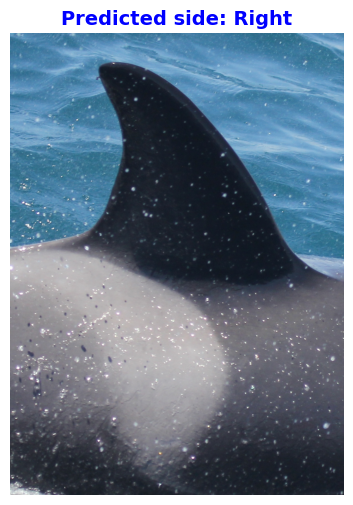

In [ ]:
# Ejemplo de predicción con visualización
image_path = '/content/drive/MyDrive/TFM/img_prueba2/Results/S0010_60D_1__9850_crop_1.jpg'
predict_side(image_path)


**CREACIÓN DE FUNCIÓN PARA HACER PREDICCIONES EN CARPETAS COMPLETAS Y CREAR EXCEL**

In [ ]:
# Creo la función para hacer predicciones usando la función predict_side que he
#creado antes

def predict_all_sides(input_folder, output_file):
    for file in os.listdir(input_folder): #bucle en las imágenes de la carpeta
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_folder, file) #almacena path de imagen

            try:
                # Realizar la predicción usando la función predict_side()
                result = predict_side(img_path)

                # Guardar resultado en una tabla excel
                results.append({'Nombre de la Imagen': file, 'Lado de la Aleta': result})

            except Exception as e:
                print(f"Error con {file}: {e}")

    # Guardar resultados en Excel
    df = pd.DataFrame(results) # conviero resultados en dataframe
    df.to_excel(output_file, index=False) #y los paso a archivo excel
    print(f"\n Archivo de resultados: {output_file}")


**USO PREDICCIONES EN TODAS LAS IMÁGENES DE UNA CARPETA Y CREACIÓN DE TABLA EXCEL DE RESULTADOS**

In [ ]:
# Ruta de la carpeta con las imágenes
input_folder = '/content/drive/MyDrive/TFM/img_prueba2/Results'
output_file = '/content/drive/MyDrive/TFM/img_prueba2/Results/predicciones.xlsx'

# Lista para almacenar resultados
results = []

# Ejecutar predicción en todas las imágenes
predict_all_sides(input_folder, output_file)